<a href="https://colab.research.google.com/github/VaibhavKumar2005/AI-ML-Journey-Repo/blob/main/ML13(TimeSeriesAnalysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(url)
df.columns = ["Month", "Passengers"]

df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


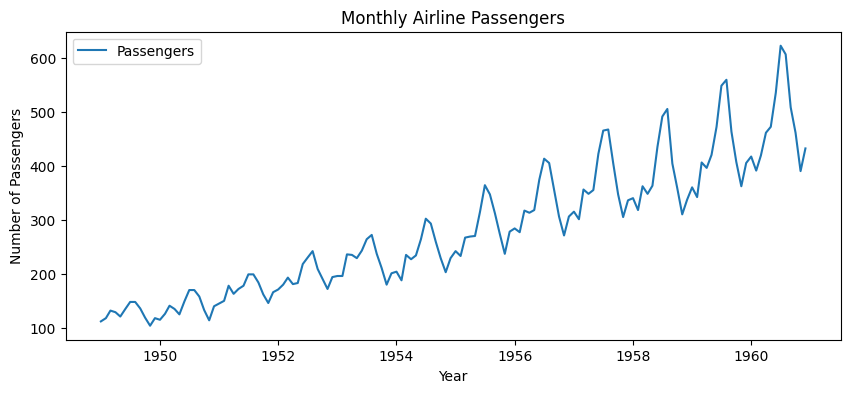

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["Passengers"], label="Passengers")
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

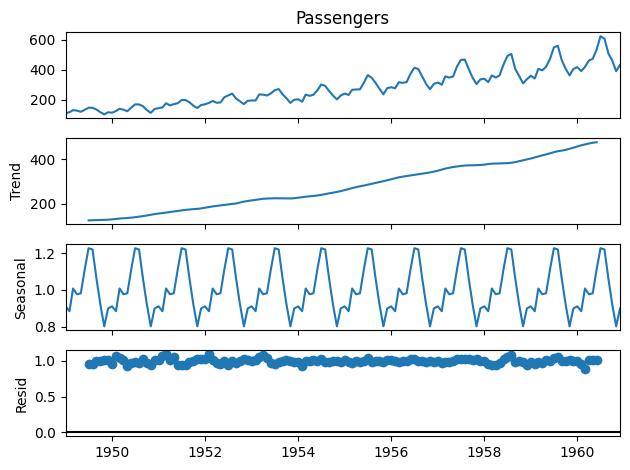

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["Passengers"], model="multiplicative")
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["Passengers"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


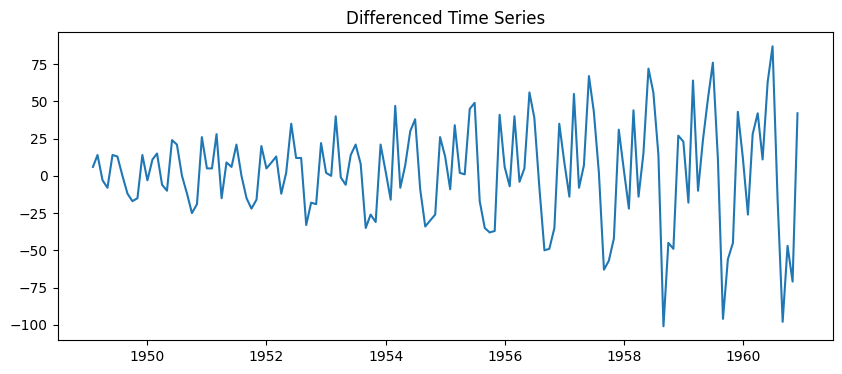

In [ ]:
df_diff = df["Passengers"].diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(df_diff)
plt.title("Differenced Time Series")
plt.show()

In [ ]:
train = df["Passengers"][:-12]
test  = df["Passengers"][-12:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,2))  # (p,d,q)
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -607.782
Date:                Wed, 24 Dec 2025   AIC                           1225.563
Time:                        04:22:30   BIC                           1239.939
Sample:                    01-01-1949   HQIC                          1231.405
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6660      0.024     68.561      0.000       1.618       1.714
ar.L2         -0.9294      0.022    -41.536      0.000      -0.973      -0.886
ma.L1         -1.8324      0.032    -56.857      0.0

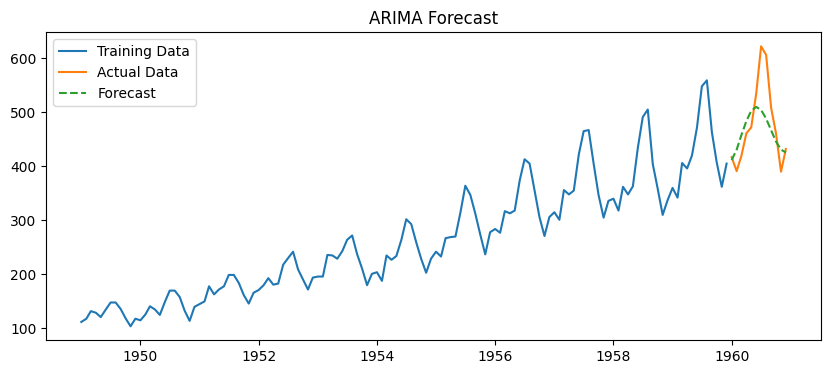

In [ ]:
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10,4))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 41.83479799137674
RMSE: 55.2228387419131
